# 樣型識別 HW5 袁聖博

## 有多做一些模型訓練
### 所以跟網路大學所繳交的會有些不同

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 3ms/step - loss: 0.6346 - accuracy: 0.8094 - val_loss: 0.3330 - val_accuracy: 0.9046
Epoch 2/2
375/375 [==============================] - 1s 2ms/step - loss: 0.2475 - accuracy: 0.9237 - val_loss: 0.1782 - val_accuracy: 0.9478
Epoch 1/2
375/375 [==============================] - 1s 3ms/step - loss: 0.2825 - accuracy: 0.9189 - val_loss: 0.1418 - val_accuracy: 0.9578
Epoch 2/2
375/375 [==============================] - 1s 3ms/step - loss: 0.1185 - accuracy: 0.9644 - val_loss: 0.1101 - val_accuracy: 0.9669


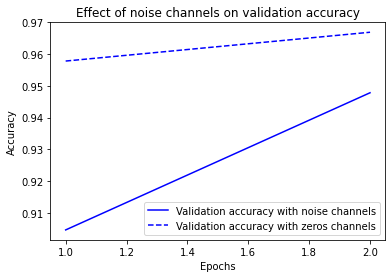

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 3)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 1s 2ms/step - loss: 2.3166 - accuracy: 0.1042 - val_loss: 2.3073 - val_accuracy: 0.1034
Epoch 2/2
375/375 [==============================] - 1s 2ms/step - loss: 2.2998 - accuracy: 0.1154 - val_loss: 2.3084 - val_accuracy: 0.1043


In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 1s 2ms/step - loss: 1130.3691 - accuracy: 0.5052 - val_loss: 1.9711 - val_accuracy: 0.3349
Epoch 2/2
375/375 [==============================] - 1s 2ms/step - loss: 4.3147 - accuracy: 0.3154 - val_loss: 2.3552 - val_accuracy: 0.1976


In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 1s 2ms/step - loss: 0.3622 - accuracy: 0.9115 - val_loss: 0.1871 - val_accuracy: 0.9485
Epoch 2/2
375/375 [==============================] - 1s 2ms/step - loss: 0.1413 - accuracy: 0.9647 - val_loss: 0.1510 - val_accuracy: 0.9681


In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 1s 2ms/step - loss: 0.6686 - accuracy: 0.8396 - val_loss: 0.3559 - val_accuracy: 0.9053
Epoch 2/2
375/375 [==============================] - 1s 2ms/step - loss: 0.3511 - accuracy: 0.9032 - val_loss: 0.3054 - val_accuracy: 0.9161


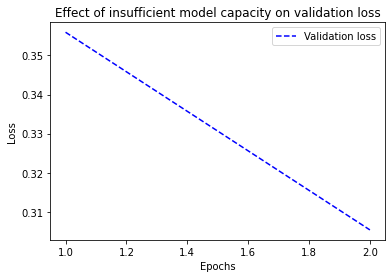

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 3)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 3ms/step - loss: 0.3518 - accuracy: 0.8989 - val_loss: 0.1762 - val_accuracy: 0.9497
Epoch 2/2
375/375 [==============================] - 1s 3ms/step - loss: 0.1612 - accuracy: 0.9517 - val_loss: 0.1325 - val_accuracy: 0.9603


In [20]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=2, batch_size=512, validation_split=0.4)


Epoch 1/2
30/30 [==============================] - 2s 45ms/step - loss: 0.5490 - accuracy: 0.7749 - val_loss: 0.4314 - val_accuracy: 0.8674
Epoch 2/2
30/30 [==============================] - 1s 24ms/step - loss: 0.3435 - accuracy: 0.8955 - val_loss: 0.3367 - val_accuracy: 0.8730


In [23]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 39ms/step - loss: 0.6348 - accuracy: 0.7289 - val_loss: 0.5563 - val_accuracy: 0.8358
Epoch 2/2
30/30 [==============================] - 1s 24ms/step - loss: 0.4965 - accuracy: 0.8650 - val_loss: 0.4574 - val_accuracy: 0.8622


In [12]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 42ms/step - loss: 0.5650 - accuracy: 0.7374 - val_loss: 0.3238 - val_accuracy: 0.8763
Epoch 2/2
30/30 [==============================] - 1s 24ms/step - loss: 0.2535 - accuracy: 0.9025 - val_loss: 0.3429 - val_accuracy: 0.8538


In [13]:
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 39ms/step - loss: 0.6034 - accuracy: 0.7879 - val_loss: 0.4810 - val_accuracy: 0.8704
Epoch 2/2
30/30 [==============================] - 1s 21ms/step - loss: 0.4139 - accuracy: 0.8954 - val_loss: 0.4182 - val_accuracy: 0.8744


In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [15]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 39ms/step - loss: 0.6166 - accuracy: 0.6619 - val_loss: 0.4845 - val_accuracy: 0.8477
Epoch 2/2
30/30 [==============================] - 1s 22ms/step - loss: 0.4863 - accuracy: 0.7907 - val_loss: 0.3840 - val_accuracy: 0.8766


# 額外自己練習訓練的模型

In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=30,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=30,
    batch_size=128,
    validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 3s 4ms/step - loss: 0.6275 - accuracy: 0.8082 - val_loss: 0.2961 - val_accuracy: 0.9127
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2599 - accuracy: 0.9201 - val_loss: 0.2725 - val_accuracy: 0.9202
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.1692 - accuracy: 0.9477 - val_loss: 0.1611 - val_accuracy: 0.9533
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.1184 - accuracy: 0.9624 - val_loss: 0.1376 - val_accuracy: 0.9578
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9733 - val_loss: 0.1592 - val_accuracy: 0.9539
Epoch 6/30
375/375 [==============================] - 1s 2ms/step - loss: 0.0647 - accuracy: 0.9795 - val_loss: 0.1406 - val_accuracy: 0.9610
Epoch 7/30
375/375 [==============================] - 1s 2ms/step - loss: 0.0482 - accuracy: 0.9842 - val_loss: 0.1274 - val_accuracy: 0.9667
Epoch 

375/375 [==============================] - 1s 2ms/step - loss: 9.6498e-05 - accuracy: 1.0000 - val_loss: 0.1503 - val_accuracy: 0.9815
Epoch 29/30
375/375 [==============================] - 1s 2ms/step - loss: 8.3172e-05 - accuracy: 1.0000 - val_loss: 0.1538 - val_accuracy: 0.9806
Epoch 30/30
375/375 [==============================] - 1s 2ms/step - loss: 2.0817e-04 - accuracy: 0.9999 - val_loss: 0.1547 - val_accuracy: 0.9811


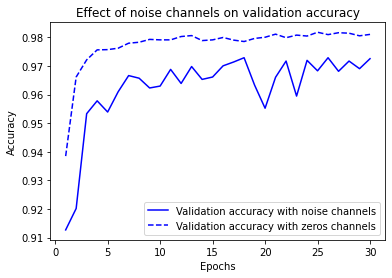

In [8]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 31)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# The nature of generalization in deep learning
### Fitting a MNIST model with randomly shuffled labels

In [9]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 2.3809 - accuracy: 0.0980 - val_loss: 2.3234 - val_accuracy: 0.1065
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 2.3095 - accuracy: 0.1124 - val_loss: 2.3105 - val_accuracy: 0.1035
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2969 - accuracy: 0.1205 - val_loss: 2.3148 - val_accuracy: 0.1050
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2852 - accuracy: 0.1334 - val_loss: 2.3220 - val_accuracy: 0.1028
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2703 - accuracy: 0.1471 - val_loss: 2.3296 - val_accuracy: 0.0996
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2527 - accuracy: 0.1625 - val_loss: 2.3484 - val_accuracy: 0.1016
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2298 - accuracy: 0.1735 - val_loss: 2.3572 - val_accuracy: 0.0987

Epoch 58/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9819 - accuracy: 0.6701 - val_loss: 4.4934 - val_accuracy: 0.1058
Epoch 59/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9664 - accuracy: 0.6786 - val_loss: 4.5668 - val_accuracy: 0.1015
Epoch 60/100
375/375 [==============================] - 1s 3ms/step - loss: 0.9518 - accuracy: 0.6835 - val_loss: 4.5947 - val_accuracy: 0.1040
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9381 - accuracy: 0.6866 - val_loss: 4.6145 - val_accuracy: 0.1041
Epoch 62/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9229 - accuracy: 0.6914 - val_loss: 4.7034 - val_accuracy: 0.1027
Epoch 63/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9107 - accuracy: 0.6954 - val_loss: 4.7316 - val_accuracy: 0.1034
Epoch 64/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8970 - accuracy: 0.7025 - val_loss: 4.8080 - val_accuracy:

#  Improving model fit

In [10]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=30,
          batch_size=128,
          validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 1s 3ms/step - loss: 344.4498 - accuracy: 0.3589 - val_loss: 2.0728 - val_accuracy: 0.2373
Epoch 2/30
375/375 [==============================] - 1s 2ms/step - loss: 3.6515 - accuracy: 0.2160 - val_loss: 2.2515 - val_accuracy: 0.2201
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 2.8203 - accuracy: 0.2397 - val_loss: 2.2795 - val_accuracy: 0.2429
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 2.6869 - accuracy: 0.2433 - val_loss: 2.1322 - val_accuracy: 0.2238
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 2.7997 - accuracy: 0.2472 - val_loss: 2.5296 - val_accuracy: 0.2929
Epoch 6/30
375/375 [==============================] - 1s 2ms/step - loss: 2.3133 - accuracy: 0.2327 - val_loss: 2.1410 - val_accuracy: 0.2154
Epoch 7/30
375/375 [==============================] - 1s 2ms/step - loss: 2.4293 - accuracy: 0.2343 - val_loss: 2.3478 - val_accuracy: 0.2188
Epoc

In [11]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=30,
          batch_size=128,
          validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 2s 3ms/step - loss: 0.3744 - accuracy: 0.9122 - val_loss: 0.1881 - val_accuracy: 0.9468
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.1419 - accuracy: 0.9623 - val_loss: 0.1779 - val_accuracy: 0.9600
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.1118 - accuracy: 0.9722 - val_loss: 0.1779 - val_accuracy: 0.9691
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.0976 - accuracy: 0.9782 - val_loss: 0.1814 - val_accuracy: 0.9675
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9811 - val_loss: 0.2087 - val_accuracy: 0.9652
Epoch 6/30
375/375 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9844 - val_loss: 0.2885 - val_accuracy: 0.9630
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.0735 - accuracy: 0.9858 - val_loss: 0.2325 - val_accuracy: 0.9730
Epoch 

# A simple logistic regression on MNIST

In [12]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=30,
    batch_size=128,
    validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 1s 3ms/step - loss: 0.6658 - accuracy: 0.8337 - val_loss: 0.3590 - val_accuracy: 0.9024
Epoch 2/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3516 - accuracy: 0.9033 - val_loss: 0.3083 - val_accuracy: 0.9121
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3159 - accuracy: 0.9122 - val_loss: 0.2898 - val_accuracy: 0.9191
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2997 - accuracy: 0.9162 - val_loss: 0.2800 - val_accuracy: 0.9233
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2898 - accuracy: 0.9193 - val_loss: 0.2745 - val_accuracy: 0.9236
Epoch 6/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2830 - accuracy: 0.9207 - val_loss: 0.2712 - val_accuracy: 0.9275
Epoch 7/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2783 - accuracy: 0.9225 - val_loss: 0.2678 - val_accuracy: 0.9269
Epoch 

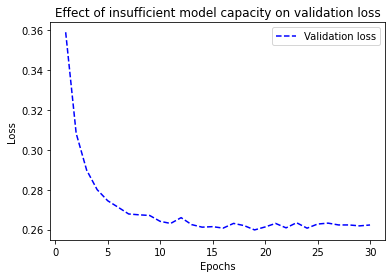

In [13]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 31)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [14]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=30,
    batch_size=128,
    validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 2s 3ms/step - loss: 0.3677 - accuracy: 0.8949 - val_loss: 0.1939 - val_accuracy: 0.9449
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.1672 - accuracy: 0.9498 - val_loss: 0.1512 - val_accuracy: 0.9551
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.1185 - accuracy: 0.9653 - val_loss: 0.1140 - val_accuracy: 0.9653
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.0893 - accuracy: 0.9730 - val_loss: 0.1077 - val_accuracy: 0.9676
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9784 - val_loss: 0.1025 - val_accuracy: 0.9700
Epoch 6/30
375/375 [==============================] - 1s 2ms/step - loss: 0.0593 - accuracy: 0.9814 - val_loss: 0.0973 - val_accuracy: 0.9710
Epoch 7/30
375/375 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9843 - val_loss: 0.0879 - val_accuracy: 0.9752
Epoch 

# Improving generalization

## Original model

In [15]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=40, batch_size=1024, validation_split=0.4)

Epoch 1/40
15/15 [==============================] - 4s 210ms/step - loss: 0.5693 - accuracy: 0.7207 - val_loss: 0.4492 - val_accuracy: 0.8594
Epoch 2/40
15/15 [==============================] - 1s 70ms/step - loss: 0.3860 - accuracy: 0.8775 - val_loss: 0.3705 - val_accuracy: 0.8652
Epoch 3/40
15/15 [==============================] - 1s 52ms/step - loss: 0.3029 - accuracy: 0.9079 - val_loss: 0.3179 - val_accuracy: 0.8898
Epoch 4/40
15/15 [==============================] - 1s 46ms/step - loss: 0.2455 - accuracy: 0.9273 - val_loss: 0.2962 - val_accuracy: 0.8906
Epoch 5/40
15/15 [==============================] - 1s 55ms/step - loss: 0.2079 - accuracy: 0.9382 - val_loss: 0.2813 - val_accuracy: 0.8915
Epoch 6/40
15/15 [==============================] - 1s 63ms/step - loss: 0.1758 - accuracy: 0.9481 - val_loss: 0.3090 - val_accuracy: 0.8756
Epoch 7/40
15/15 [==============================] - 1s 55ms/step - loss: 0.1573 - accuracy: 0.9528 - val_loss: 0.2749 - val_accuracy: 0.8924
Epoch 8/40
1

In [18]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=40, batch_size=1024, validation_split=0.4)

Epoch 1/40
15/15 [==============================] - 8s 494ms/step - loss: 0.6189 - accuracy: 0.7629 - val_loss: 0.5554 - val_accuracy: 0.8413
Epoch 2/40
15/15 [==============================] - 1s 61ms/step - loss: 0.5078 - accuracy: 0.8747 - val_loss: 0.4823 - val_accuracy: 0.8638
Epoch 3/40
15/15 [==============================] - 1s 60ms/step - loss: 0.4326 - accuracy: 0.8969 - val_loss: 0.4291 - val_accuracy: 0.8679
Epoch 4/40
15/15 [==============================] - 1s 55ms/step - loss: 0.3738 - accuracy: 0.9083 - val_loss: 0.3856 - val_accuracy: 0.8766
Epoch 5/40
15/15 [==============================] - 1s 58ms/step - loss: 0.3268 - accuracy: 0.9173 - val_loss: 0.3554 - val_accuracy: 0.8846
Epoch 6/40
15/15 [==============================] - 1s 94ms/step - loss: 0.2880 - accuracy: 0.9255 - val_loss: 0.3297 - val_accuracy: 0.8869
Epoch 7/40
15/15 [==============================] - 1s 47ms/step - loss: 0.2575 - accuracy: 0.9312 - val_loss: 0.3113 - val_accuracy: 0.8886
Epoch 8/40
1

In [22]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=40, batch_size=1024, validation_split=0.4)

Epoch 1/40
15/15 [==============================] - 2s 87ms/step - loss: 0.7664 - accuracy: 0.7324 - val_loss: 0.3827 - val_accuracy: 0.8485
Epoch 2/40
15/15 [==============================] - 1s 51ms/step - loss: 0.3085 - accuracy: 0.8819 - val_loss: 0.3197 - val_accuracy: 0.8710
Epoch 3/40
15/15 [==============================] - 1s 53ms/step - loss: 0.2563 - accuracy: 0.8961 - val_loss: 0.4919 - val_accuracy: 0.7767
Epoch 4/40
15/15 [==============================] - 1s 50ms/step - loss: 0.1841 - accuracy: 0.9308 - val_loss: 0.2668 - val_accuracy: 0.8902
Epoch 5/40
15/15 [==============================] - 1s 52ms/step - loss: 0.1422 - accuracy: 0.9469 - val_loss: 0.2727 - val_accuracy: 0.8920
Epoch 6/40
15/15 [==============================] - 1s 50ms/step - loss: 0.1333 - accuracy: 0.9528 - val_loss: 0.2677 - val_accuracy: 0.8878
Epoch 7/40
15/15 [==============================] - 1s 50ms/step - loss: 0.0242 - accuracy: 0.9977 - val_loss: 0.3779 - val_accuracy: 0.8886
Epoch 8/40
15

In [25]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6111 - accuracy: 0.7821 - val_loss: 0.4860 - val_accuracy: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4255 - accuracy: 0.8947 - val_loss: 0.4079 - val_accuracy: 0.8804
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3506 - accuracy: 0.9150 - val_loss: 0.3830 - val_accuracy: 0.8824
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3074 - accuracy: 0.9247 - val_loss: 0.3590 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2878 - accuracy: 0.9291 - val_loss: 0.3577 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2719 - accuracy: 0.9333 - val_loss: 0.3603 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2601 - accuracy: 0.9394 - val_loss: 0.3888 - val_accuracy: 0.8735
Epoch 8/20
30

### Different weight regularizers available in Keras

In [26]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

### Adding dropout to the IMDB model

In [28]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6425 - accuracy: 0.6205 - val_loss: 0.5541 - val_accuracy: 0.8322
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5192 - accuracy: 0.7667 - val_loss: 0.4177 - val_accuracy: 0.8734
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4315 - accuracy: 0.8235 - val_loss: 0.3466 - val_accuracy: 0.8783
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3599 - accuracy: 0.8611 - val_loss: 0.2988 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3058 - accuracy: 0.8909 - val_loss: 0.2792 - val_accuracy: 0.8940
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2695 - accuracy: 0.9091 - val_loss: 0.3121 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2349 - accuracy: 0.9215 - val_loss: 0.2747 - val_accuracy: 0.8883
Epoch 8/20
30